<a href="https://colab.research.google.com/github/parthasarathydNU/gen-ai-coursework/blob/main/cnn-intro/building_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

Classify CIFAR 10 images with a CNN model and study the effect on the performance by varying the following modeling aspects:
1. Batch Normalization
2. Dropout
3. Number of convolution and pooling layers
4. Activation functions

## Reference Notebook:

TensorFlow's tutorial on building CNNs : https://www.tensorflow.org/tutorials/images/cnn

### Goals:
In this notebook we will be learning how to build, train and classify image datasets using a simple CNN.

We will be using tensorflow and keras.

#### Using available data from tensorflow

- datasets: This refers to the various datasets that are available in TensorFlow Keras, such as MNIST, CIFAR-10, and ImageNet. These datasets are used for training and evaluating machine learning models

- layers: This refers to the different types of layers that can be used to build a neural network model, such as Dense, Conv2D, and MaxPooling2D.

- models: This refers to the different types of models that can be built using TensorFlow Keras, such as Sequential and Functional


We will be using the CIFAR-10 dataset: The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes are:

["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [1]:
# Importing required libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


The dataset is divided into 50,000 training images and 10,000 testing images. The training and testing images are further divided into five batches of 10,000 images each.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


## Data Inspection

### Plotting just one image

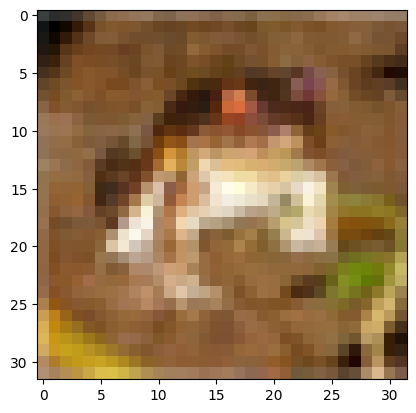

In [3]:
# View the first image from the dataset
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

# Looks like some animal? ALso looks like a face

### Printing the target labels

In [4]:
# Here we see that while the images are images, the labels are 2D arrays
train_labels, test_labels

(array([[6],
        [9],
        [9],
        ...,
        [9],
        [1],
        [1]], dtype=uint8),
 array([[3],
        [8],
        [8],
        ...,
        [5],
        [1],
        [7]], dtype=uint8))

### Checking if the target labels match the images in the training dataset

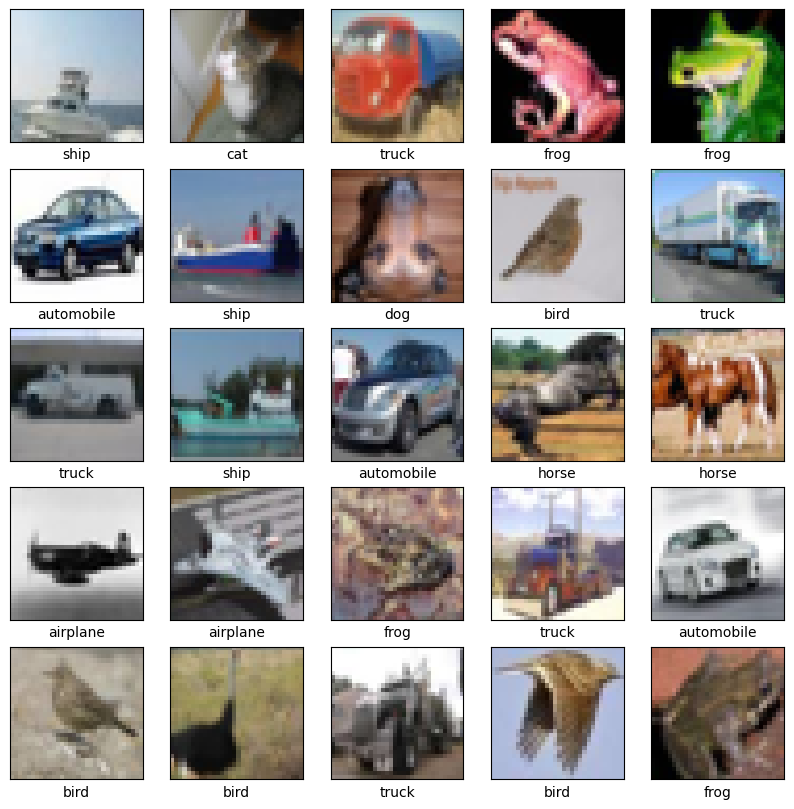

In [5]:
# To verify the data looks correct, we plot the first 25 imags along with the class names below the image

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(100, 125):
    plt.subplot(5,5,i - 100 +1) # subplot(nrows, ncols, index)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # this plots the image as is, this is not an issue
    plt.xlabel(class_names[train_labels[i][0]]) # We try to plot the name that corresponds to that training label



In [6]:
# Looks good so far the images seem to match the descriptions of the training labels.

# Looking at the shape of each image
train_images.shape

(50000, 32, 32, 3)

## Creating the convolutional neural network base

The pattern we use here is common pattern : Conv2D and MaxPooling 2D layers.

It is important for us to be able to visualize what is happening here so we can understand intuitively what goes on within the network.

This CNN takes an input of size (image_height, image_width, color_channels) for each image in the batch.

Above we see that each image in the training dataset is of shape (32, 32, 3). Let's build our model accordingly.



In [7]:
# Documentation abotu the various methods used here
# https://keras.io/api/layers/convolution_layers/convolution2d/
# https://keras.io/api/layers/pooling_layers/max_pooling2d/

"""
keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
"""

convolution_layer_1 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))



### Understanding the above line of code

Here we are trying to build one layer that has the following properties.

- 32 filters: This means that the layer will apply 32 different filters to the input data. Each filter will extract a specific feature from the input data
- (3,3) kernel size: this means that each filter will be a 3x3 matrix of weights
- relu activation: The output of the layer will be passed through a rectified linear unit activation function
- innput shape (32, 32, 3) : This means that the input data to the layer will be 32x32 color images with 3 chanels 9 RGB

The purpose of this layer is to extract features from the input images such as edges, corners and textures.

The output of this will be a map with 32 chanels where each chanel represents a different feature. This layer is typically used as the first layer in a convolutional neural network (CNN). CNNs are a type of deep learning model that is specifically designed for processing data that has a grid-like structure, such as images.




### Trying to visualize one layer

To visualize the operation and effects of a convolutional layer in a CNN, it's helpful to create a model with the specified properties and then use an example image to see how the layer transforms the input.

- **Define the Convolutional Layer:** This layer will have 32 filters with a kernel size of (3,3), use ReLU activation, and expect an input shape of (32, 32, 3).

- **Apply the Layer to an Example Image:** You can use a sample image or generate random data that matches the input shape.

- **Visualize the Output:** For each of the 32 output channels, visualize the result to see how different features are extracted by different filters.

#### Defining One layer

In [10]:
# Define the convolutional layer
conv_layer = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(32, 32, 3)
)

#### Converting the input image for processing by model layer

In [46]:
# Using our training image at 0th index
input_image = train_images[0] # Select the first image from the training dataset

# Add a batch dimension to the input image
input_image = tf.expand_dims(input_image, axis=0)  # Add a batch dimension so we can pass into CNN Model

# Convert the input image to float32
input_image = tf.cast(input_image, tf.float32)

input_image = input_image / np.max(input_image)

In [47]:
# Apply the convolutional layer to the image
output_features = conv_layer(input_image)

# Convert the output to a numpy array for visualization
output_features = output_features.numpy()

#### Visualizing all channels of this one layer

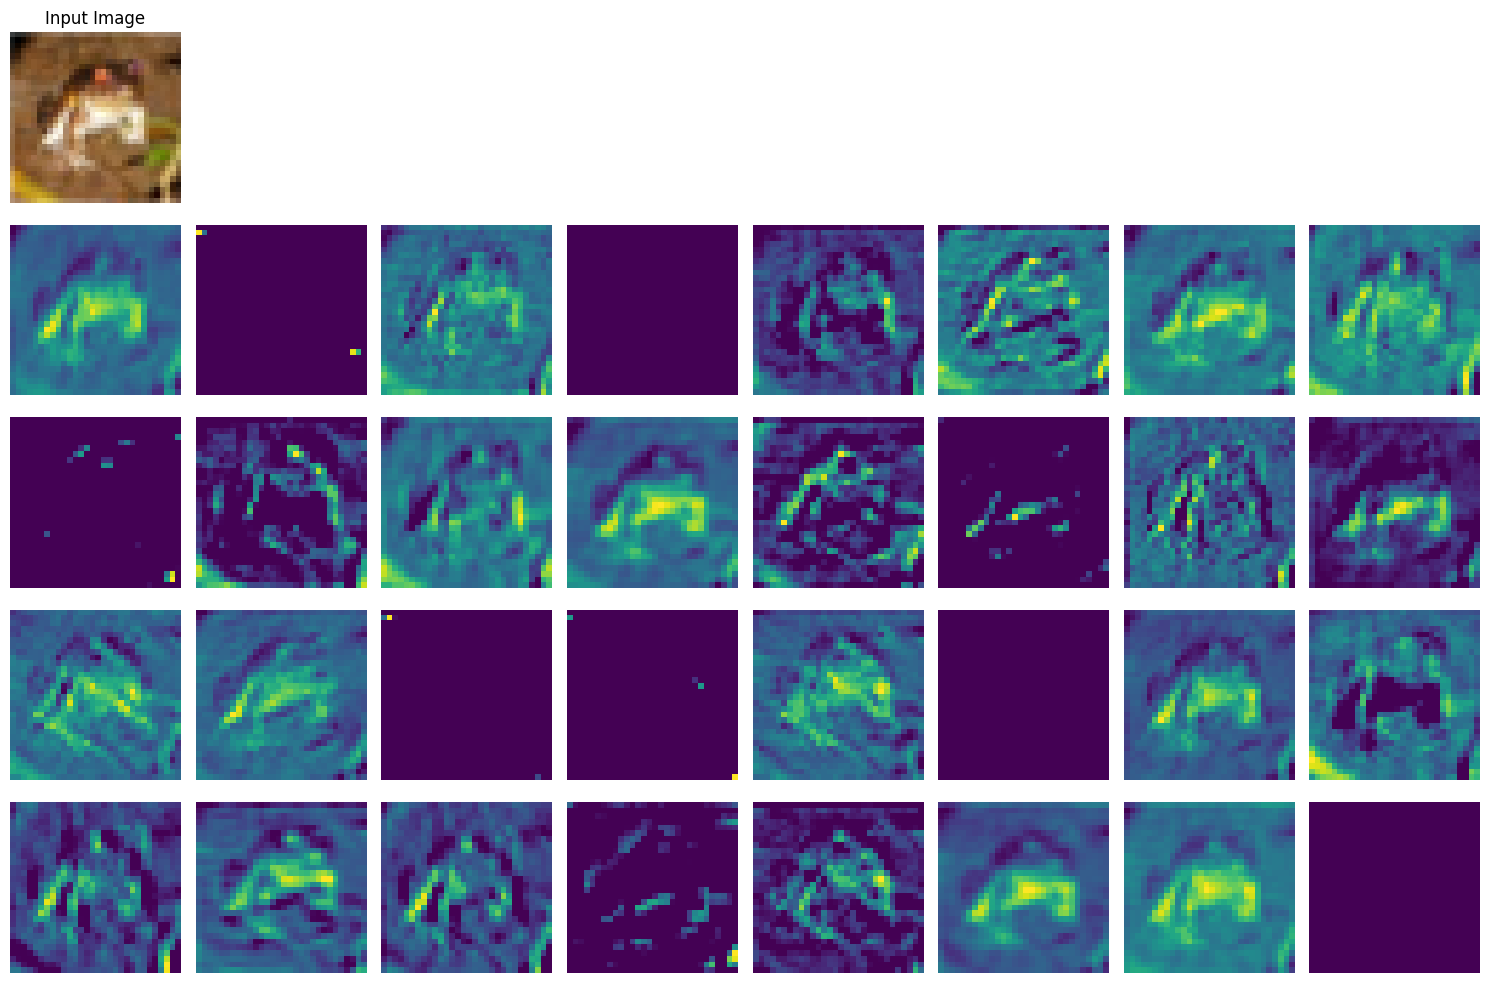

In [49]:
# Visualize the input image
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(15, 10))  # Adjust the grid size to accommodate the input image
axes[0, 0].imshow(input_image[0])
axes[0, 0].set_title('Input Image')
axes[0, 0].axis('off')

# Merge the first row, except the first column, for symmetry
for i in range(1, 8):
    fig.delaxes(axes[0, i])

"""
ax.imshow(output_features[0, :, :, i], cmap='viridis'):

output_features[0, :, :, i]:
This part selects a single feature map from the output of the convolutional layer.
Here, output_features is a 4D array where the dimensions represent:
- 0     : This is the index of the first (and in this case, only) image in the batch.
          Since we passed only one image, we use 0 to select it.
- `:,:` : These two slices select all the rows and columns of the feature map,
          meaning it selects the entire spatial dimension of the feature map.
- i.    : This is the index of the current filter's output being visualized.
          Since there are 32 filters, i varies from 0 to 31, allowing you to visualize the
          output from each filter.

- cmap='viridis': This argument specifies the colormap used to display the image.
                  The 'viridis' colormap is a popular choice for displaying single-channel
                  (grayscale) images in a way that is perceptually uniform and translates well
                  to black-and-white printing.
"""

# Visualize the outputs of the 32 filters
for i, ax in enumerate(axes.flat[8:]):  # Start plotting from the second row
    ax.imshow(output_features[0, :, :, i], cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Visualizing the remaining n layers in the CNN

In [32]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
])

#### Understanding the model structure

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.



### Passing it through the various layers of the model and storing the output for visualization

In [50]:
# List to hold output of each layer
layer_outputs = []

current_input = input_image # Along with extra dimension for batch
# Pass the image through each layer sequentially
for layer in model.layers:
    current_input = layer(current_input)
    layer_outputs.append(current_input.numpy())  # Ensure to convert tensor to numpy array for visualization

### Visual output as image passes through the various layers

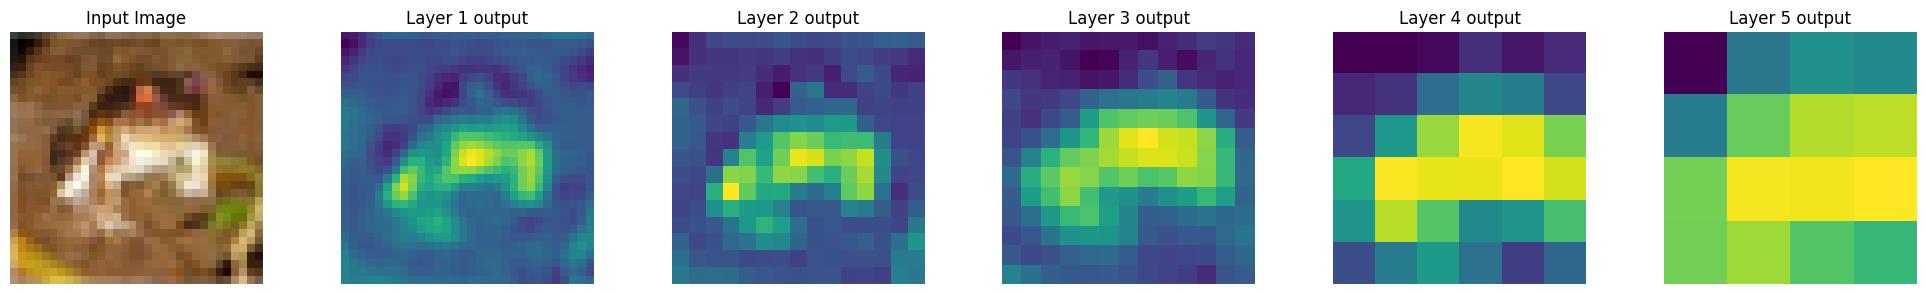

In [51]:
# Plotting
# Change to one row with multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(model.layers) + 1, figsize=(20, 3))  # Adjust figsize for better visibility in a horizontal layout

# Visualize the input image
axes[0].imshow(input_image[0])
axes[0].set_title('Input Image')
axes[0].axis('off')

# Visualize the outputs of each layer
for i, output in enumerate(layer_outputs):
    # As convolution and pooling reduce dimensions, check if there's enough spatial dimension left for visualization
    if output.shape[1] > 1 and output.shape[2] > 1:
        # Summing over the channel dimension to visualize feature maps
        feature_maps = np.sum(output[0, :, :, :], axis=-1)
        axes[i+1].imshow(feature_maps, cmap='viridis')
        axes[i+1].set_title(f'Layer {i+1} output')
        axes[i+1].axis('off')

plt.tight_layout()
plt.show()

### What are channels and why are the width and height dimensions shrinking as we go deeper into the network ?

##### Understanding Channels:

1. **Channels in Input and Output** : In CNNs, the term "channels" refers to the depth of a feature map. For an RGB image, the input has three channels—red, green, and blue. Each channel holds information about the intensity of colors in the image. When a convolutional layer processes an image, it applies several filters to the input. Each filter produces a separate output, and collectively, these outputs form multiple channels in the output feature map. In the above image, we can see outputs of the 5 layers. And each of these outputs are a summed representation of the various channels that make up that layer.

> `feature_map = np.sum(layer_output[0, :, :, :], axis=-1)`

2. **Role of Channels** : Each channel in a feature map can be seen as a response of applying a particular filter over the input. These filters are designed to detect specific types of features at various points in the image, such as edges, textures, or more complex patterns in deeper layers (like parts of objects). The depth (number of channels) in the feature maps increases because each new layer typically looks for more complex features, and more filters (channels) are needed to capture these diverse features.

##### Increasing Channels and Decreasing Spatial Dimensions

1. **Increasing Channels:**

- **Complex Feature Representation:** As you progress deeper into a network, the complexity of the features that need to be detected increases. Initially, simple features like edges and corners are detected, but later layers may need to recognize parts of objects or entire objects. Increasing the number of channels (filters) allows the network to create more detailed and complex representations, each capturing different aspects or combinations of features from the previous layer.
- **Abstract Representations:** More channels can encode more abstract aspects of the input data. For example, one channel might activate strongly for eyes in images of faces, while another might respond to the edges of a mouth.

2. **Decreasing Spatial Dimensions:**

- **Reduction of Computation:** Reducing the width and height of the feature maps lowers the computational load for the network. This is crucial as the depth (number of channels) increases, which would otherwise lead to a significant increase in computational requirements.
- **Increasing Receptive Field:** Pooling layers (like MaxPooling) reduce the spatial dimensions of the feature maps but help increase the receptive field of the filters. The receptive field is the region in the input space that each filter covers. By increasing the receptive field, the network can capture more global features that are spread out over larger areas of the input. *We can observe this by looking at how the output of layer 1 varies from the output of layer 5.*
- **Focus on High-Level Features:** As spatial dimensions decrease, the network becomes less sensitive to the exact spatial positions of features and more focused on whether specific features exist in the input, regardless of their exact locations. This abstraction is beneficial for tasks like image classification, where the precise location of features is less important than their presence.

Together, increasing the number of channels while reducing spatial dimensions helps balance the computational efficiency and the ability to capture and process higher-level features. This design also aligns with how biological vision processes visual information, focusing more on identifying patterns and objects rather than processing raw pixel data at every point.

### Completing the model by adding dense layers

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.

First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [54]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### How does our model look now after adding the dense layers

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### What are Dense Layers?

1. **Definition**: Dense layers, also known as fully connected layers, are traditional neural network layers where each input node is connected to each output node. The dense layer's output is calculated from the dot product of the input and the layer's weights, plus a bias term.

### Role of Dense Layers in CNNs

1. **From Features to Predictions**: In a CNN, convolutional layers and pooling layers are primarily responsible for feature extraction—they detect patterns, textures, and objects within the image. Once these features are extracted and spatial hierarchies built, dense layers are used to make sense of these features for classification or regression tasks. They map the extracted features into the final output space (e.g., class scores in classification).

2. **Classification**: In the context of image classification, after all convolutional and pooling layers have processed the image, dense layers act as a classifier on top of these features. By flattening the 3D output to 1D, all spatial information is converted into a high-dimensional feature vector, which dense layers can process to perform classification.

### Deciding the Number and Configuration of Dense Layers

1. **Number of Layers**: The number of dense layers and the number of neurons in each layer are hyperparameters that can significantly affect the performance of the model. Typically, the number of dense layers is decided based on the complexity of the task and the level of non-linearity and abstraction needed in making decisions from the features. More layers can capture more complex patterns but also make the model more prone to overfitting and computationally expensive.

2. **Activation Functions**:
   - **ReLU in Hidden Layers**: Dense layers often use the ReLU activation function (or variants like Leaky ReLU) to introduce non-linearities into the model, allowing it to learn more complex patterns.
   - **No Activation in Output Layer**: The final dense layer often does not have an activation function if the model is designed for multi-class classification using softmax cross-entropy loss. This is because the softmax activation function (which converts raw class scores into probabilities) is usually applied after the output layer during the loss calculation in the training phase, rather than being included as part of the model architecture itself.

### Specific Use in this Model

1. **Flatten Layer**: Before the first dense layer, a Flatten layer is used to convert the 3D tensor from the convolutional layers into a 1D vector. This vector is what the dense layers will process.
   
2. **Hidden Dense Layer**: The first dense layer with 64 units and ReLU activation acts to interpret these flattened features and continues the non-linear processing.

3. **Output Dense Layer**: The final dense layer with 10 units maps the output of the previous dense layer to the 10 class scores needed for classification in the CIFAR-10 dataset. This layer doesn’t use an activation function because, in TensorFlow and similar frameworks, the softmax function is typically integrated into the loss function (like `tf.nn.softmax_cross_entropy_with_logits`) during training.

By using dense layers, the model is able to translate the high-level features extracted by the convolutions into predictions suitable for a given task, such as classifying images into one of several categories based on the learned features. The configuration and depth of these dense layers are adjusted based on empirical performance and the specific requirements of the task.

## Compile and Train the Model

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.8642 - accuracy: 0.3617 - val_loss: 1.4729 - val_accuracy: 0.4569
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3961 - accuracy: 0.4986 - val_loss: 1.3459 - val_accuracy: 0.5186
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2275 - accuracy: 0.5694 - val_loss: 1.1367 - val_accuracy: 0.5966
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1105 - accuracy: 0.6130 - val_loss: 1.1882 - val_accuracy: 0.5869
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0250 - accuracy: 0.6412 - val_loss: 1.0759 - val_accuracy: 0.6297
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9581 - accuracy: 0.6665 - val_loss: 1.1033 - val_accuracy: 0.6244
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8880 - accuracy: 0.6933 - val_loss: 1.1699 -

## Evaluate the model

313/313 - 7s - loss: 1.1073 - accuracy: 0.6435 - 7s/epoch - 21ms/step


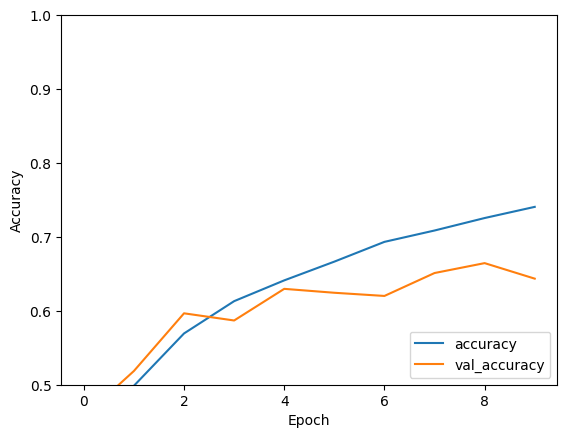

In [57]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [58]:
print(test_acc)

0.6434999704360962
